In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

B:\Programs\ML\Major\data\smudged\14.jpg
3328
2560
10
13
1/1 [==============================] - 0s 32ms/step


True

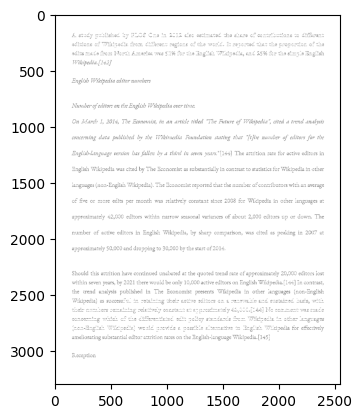

In [22]:
PATH=r'B:\Major\code\newModel'
os.listdir(PATH)

PATH2=r'B:\Programs\ML\Major\data\smudged'
os.listdir(PATH2)

PATH3=r'B:\Programs\ML\Major\data\smudged_output'

model = 'textOriginalNoiseEncoder.json'
weight = 'textOriginalNoiseEncoder_weights.h5'

slice_size = 256

input_no = 14
input_file_name = str(input_no) + '.jpg'
print("{}\{}".format(PATH2, input_file_name))

img = cv2.imread("{}\{}".format(PATH2, input_file_name), 0)
plt.imshow(img)
v_res = img.shape[0]
h_res = img.shape[1]
img.shape

def apply_gamma(image):
    k=1.8
    image = 255 * (image/255)**k
    return image

img = apply_gamma(img)
img

def count_blocks(res, slice_size):
    blocks = 0
    if res % slice_size == 0:
        blocks = int(res/slice_size)
    else:
        blocks = (int(res/slice_size)) + 1
    return blocks

def resizeImage(img, v_res, h_res, slice_size):
    v_res = count_blocks(v_res, slice_size) * slice_size
    h_res = count_blocks(h_res, slice_size) * slice_size
    img = cv2.resize(img, (h_res, v_res))
    print(v_res)
    print(h_res)
    return img

img = resizeImage(img, v_res, h_res, slice_size)
plt.imshow(img)
img.shape

json_file = open(r'{}\{}'.format(PATH, model), 'r')
json_model = tf.keras.models.model_from_json(json_file.read())
json_model.load_weights(r'{}\{}'.format(PATH, weight))

# json_file.seek(0)
# json_file.read()

column = count_blocks(h_res, slice_size)
rows = count_blocks(v_res, slice_size)
print(column)
print(rows)

normalImg = img
newImg = None

hor_split_image = np.hsplit(normalImg, column)
for i in hor_split_image:
    v_split = np.vsplit(i, rows)
    cleanHor = None
    for j in v_split:
        smallClean = json_model.predict(j.reshape(1,256,256,1)).reshape(256, 256)
        if cleanHor is None:
            cleanHor = smallClean
        else:
            cleanHor = np.concatenate((cleanHor, smallClean), axis=0)
    if newImg is None:
        newImg = cleanHor
    else:
        newImg = np.concatenate((newImg, cleanHor), axis=1)

newImg = newImg.reshape(img.shape[0], img.shape[1])
newImg = cv2.resize(newImg, (h_res, v_res))
plt.imshow(newImg, cmap='gray')

cv2.imwrite(r'{}\output_{}'.format(PATH3, input_file_name), newImg*255)


In [23]:
import easyocr

reader = easyocr.Reader(['en'])

image_path = r'B:\Programs\ML\Major\data\smudged_output\output_' + str(input_no) + '.jpg' 
result = reader.readtext(image_path)

extracted_text = ' '.join([detection[1] for detection in result])

print(extracted_text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


E 85 Ez_lisliec %3 DZCS Cze 41 2-lZ &lgc ei-lated Aie s_sre &f CQ_ '3tha 'o_ 138 % iflere_c ediciog Ci Wini-edia frojl €eereci 0ftLe 73rc Ic zezcrted +la tLe Eropczeor &z1e edits Zeze=C1 Ncs__ E_Izezica 7728 C_ 9f $3212 318%81 WEczeZi;s12 ZS% fer 1e 8E1zeigEsh Wikipedia [1+2] English Wikipedia editor numnbers Nunnber of editor: on the English Wikipedia over time On Mvarch 1, 2014, Tle Economist; in 4n article titled "The Future of Wikipedia" cited 4 trend analysis concerning data published ly tlse Wikivedia Foundlation stating that   "[tJhe nunber of editors for the Englishy-language uersion Ias fallen by & tlird in seven years: '[144] The attrition fate for active editofs in English Wikipedia was cited by The Eccnomist &s substantially in contrast to statistics fcr Wikipedia in cther languages (non-Englis:1 Wikipedia} The Economist feported thac the number ofcontributors witi an average of five Of mcre edits per month wzs relatively constant since 20O8 fcr Wikipedia in ocher languages

In [24]:
file_path_for_txt = r'B:\Programs\ML\Major\data\smudged_output\output_'+str(input_no)+'.txt'

with open(file_path_for_txt, 'w') as file:
    # Write the text to the file
    file.write(extracted_text)